<a href="https://colab.research.google.com/github/MADNESSru/NN_models/blob/main/SimpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn #(слои функции активации и тд)
import torchvision as tv #(изображения)
import cv2 #(обработка изображений)
import os #(путиб директории)
import matplotlib.pyplot as plt
from tqdm import tqdm #(прогресс-бар для циклов)
import torch.nn.functional as F #(функции активации без параметров)

In [80]:
# Преобразование в тензор и нормализация 0-255, 0-1
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [81]:
# датасет
ds_mnist = tv.datasets.MNIST('./datasets', download=True, transform=trans)

In [82]:
ds_mnist[0][0].shape

torch.Size([1, 28, 28])

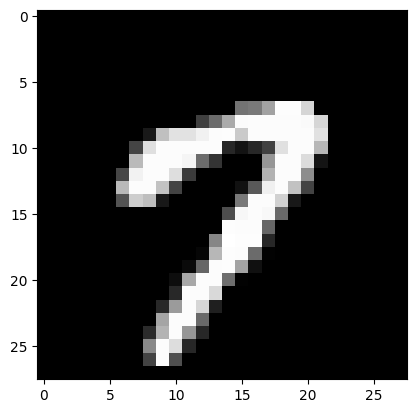

In [83]:
plt.imshow(ds_mnist[15][0].numpy()[0], cmap='gray')

In [84]:
# по 20 изображений за раз
# drop_last чтобы отбросить остаток
batch_size = 20
dataloader = torch.utils.data.DataLoader(
    ds_mnist, batch_size=batch_size, shuffle=True,
    num_workers=1, drop_last=True
)

In [85]:
# изображение + его метка
for img, label in dataloader:
  print(img.shape)
  print(label.shape)
  break

torch.Size([20, 1, 28, 28])
torch.Size([20])


In [86]:
# как в примере базового класса PyTorch
class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__() # чтобы не было ошибки о замене в nn.Module
    self.flat = nn.Flatten() # преобразование входа
    self.linear1 = nn.Linear(28*28, 100) # слой из 784 в 100 признаков
    self.linear2 = nn.Linear(100, 10) # полносвязный слой из 100 в 10 классов
    self.act = nn.ReLU()

  def forward(self, x):
    out = self.flat(x) # преобразование
    out = self.linear1(out) # перый слой
    out = self.act(out) # активация после него
    out = self.linear2(out) # второй слой
    return out # логиты(сырые выходы) для 10 классов

In [87]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [88]:
def accuracy(pred, label):
  results = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
  return results.mean()

In [89]:
model = SimpleCNN()

In [90]:
loss_fn = nn.CrossEntropyLoss()

In [91]:
# стохастический ГС для обновления параметров
# 1e-3 = 0.001
# momentum для 1)ускорения схождения
# 2) ускорения обучения
# 3) избежания локальных минимумов
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [94]:
epochs = 10 # шагов обновления весов
for epochs in range(epochs):
  loss_val = 0 # суммарная потеря за шаг
  acc_val = 0 # суммарная точность за шаг
  for img, label in (pbar := tqdm(dataloader)): # цикл по батчам в датасете
    optimizer.zero_grad() # обновление градиентов

    label = F.one_hot(label, 10).float() # для сравнения с истинными метками
    pred = model(img)

    loss = loss_fn(pred, label) # вычисление ошибки

    loss.backward() # градиенты для обновления параметров
    loss_item = loss.item() #
    loss_val += loss_item

    acc_current = accuracy(pred, label)
    acc_val += acc_current

    optimizer.step() # обновление параметров на основе градиентов

    # прогресс-бар
    pbar.set_description(f'loss: {loss_item:.5f}; accuracy: {acc_current:.3f}')
  print(loss_val/len(dataloader))
  print(acc_val/len(dataloader))

  0%|          | 0/3000 [00:00<?, ?it/s]<ipython-input-88-e6f37deda7a4>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  results = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 0.19386; accuracy: 0.950: 100%|██████████| 3000/3000 [00:32<00:00, 91.12it/s]


0.17373706373820702
0.9511166666666607


loss: 0.10217; accuracy: 0.950: 100%|██████████| 3000/3000 [00:31<00:00, 94.32it/s] 


0.16130695796975245
0.9545833333333289


loss: 0.04785; accuracy: 1.000: 100%|██████████| 3000/3000 [00:30<00:00, 96.83it/s] 


0.15067401453433557
0.9569833333333296


loss: 0.14697; accuracy: 0.950: 100%|██████████| 3000/3000 [00:30<00:00, 97.37it/s] 


0.14137133405404165
0.9602166666666608


loss: 0.25811; accuracy: 0.850: 100%|██████████| 3000/3000 [00:31<00:00, 95.13it/s] 


0.13320818295096978
0.9629333333333273


loss: 0.20894; accuracy: 0.900: 100%|██████████| 3000/3000 [00:30<00:00, 98.33it/s] 


0.12577929862681778
0.9650833333333269


loss: 0.05922; accuracy: 1.000: 100%|██████████| 3000/3000 [00:30<00:00, 96.84it/s]


0.11923767672580046
0.9669166666666607


loss: 0.12661; accuracy: 0.950: 100%|██████████| 3000/3000 [00:32<00:00, 91.69it/s]


0.11336138045135885
0.9681833333333288


loss: 0.03660; accuracy: 1.000: 100%|██████████| 3000/3000 [00:31<00:00, 96.47it/s] 


0.10788028880922744
0.9702499999999938


loss: 0.04507; accuracy: 1.000: 100%|██████████| 3000/3000 [00:31<00:00, 95.50it/s]

0.10297882420313545
0.9716666666666598


In [95]:
count_parameters(model)

79510

In [96]:
accuracy(pred, label)

<ipython-input-88-e6f37deda7a4>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  results = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


np.float64(1.0)

In [97]:
img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE) # изображение в массив numpy

In [98]:
# нужный формат под модель
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.0 # нормализация

In [99]:
img.shape

(1, 1, 28, 28)

In [100]:
t_img = torch.from_numpy(img) # в тензор
model_pred = model(t_img)

# detach чтобы только вывести результат
F.softmax(model_pred).detach().numpy()

<ipython-input-100-4ba05faa1244>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(model_pred).detach().numpy()


array([[0.04557677, 0.12412829, 0.09833425, 0.0607958 , 0.10979889,
        0.20377555, 0.074081  , 0.16924027, 0.04564932, 0.06861992]],
      dtype=float32)